O banco Thera Bank possui uma base de clientes crescente. <br>A maioria 
desses clientes são passivos (depositantes) com depósitos de tamanhos 
variados. <br>O número de clientes que também são devedores (clientes de 
ativos) é bastante pequeno, e o banco está interessado em expandir essa 
base rapidamente para trazer mais negócios de crédito e, no processo, 
ganhar mais com os juros dos empréstimos.<br> Em particular, a administração 
deseja explorar maneiras de converter seus clientes passivos em clientes de 
empréstimos pessoais (enquanto os mantém como depositantes). <br>Uma 
campanha que o banco realizou no ano passado para clientes passivos 
mostrou uma taxa de conversão saudável de mais de 9% de sucesso. <br>Isso 
encorajou o departamento de marketing de varejo a elaborar campanhas 
para melhor direcionar o marketing, a fim de aumentar a taxa de sucesso 
com um orçamento mínimo.<br>
O departamento quer construir um modelo de classificação que os 
ajude a identificar os clientes potenciais com maior probabilidade de 
adquirir o empréstimo. <br>Isso aumentará a taxa de sucesso e, ao mesmo 
tempo, reduzirá o custo da campanha.<br>
A base de dados histórica contém informações pessoais dos clientes e 
informações sobre produtos contratados.<br><br> O arquivo também contém um 
dicionário das variáveis.


Modele o problema de classificação utilizando o algoritmo KNN Classifier. <br>
Para isso:<br>
1. Faça uma breve análise exploratória sobre a base de dados.<br>
2. Divida a base de dados em treino/teste.<br>
3. Configure o classificador KNN utilizando a biblioteca SciKit learn.<br>
4. Encontre o melhor K que forneça a melhor acurácia.<br><br>
Dicas: Teste normalização das variáveis numéricas.

In [43]:
import pandas as pd

In [44]:
# Carregando base de dados

df = pd.read_excel(r"C:\Users\Rafael Pietro\OneDrive\Cursos\DNC\Datasets\Modelos Supervisionados\Classificação\Bank_Personal_Loan_Modelling.xlsx", sheet_name='Data')

In [45]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [46]:
# Através da análise das variáveis e do dicionário, algums informações relevantes:


# Variáveis categóricas:
# Personal Loan (Empréstimo Pessoal) - Este cliente aceitou o empréstimo pessoal oferecido na última campanha? Esta é a nossa variável alvo
# Securities Account (Conta de títulos) - O cliente possui conta de títulos no banco?
# CD Account (Conta de CD) - O cliente tem uma conta de certificado de depósito (CD) no banco?
# Online - O cliente usa serviços de banco pela Internet?
# Credit Card - (Cartão de crédito) - O cliente usa um cartão de crédito emitido pelo UniversalBank?

# Variáveis contínuas:

# Age (Idade) Idade do cliente
# Experience (Experiência) - anos de experiência
# Income (Renda) - Renda anual em dólares
# CCAvg (CCAvg) - gasto médio com cartão de crédito
# Mortage (Hipoteca) - Valor da hipoteca da casa

# Variáveis ​​categóricas ordinais:
# Family (Família) - tamanho da família do cliente
# Education (Educação) - nível de educação do cliente


# A variável ID não adiciona nenhuma informação interessante. 
# Não há associação entre o ID de cliente de uma pessoa e o empréstimo, também não fornece nenhuma conclusão geral para futuros clientes de empréstimo em potencial. 
# Podemos desconsiderar essas informações para o modelo.
# Zip code também pode ser descosiderada, uma vez que a informação de distância entre zip code pode não ser realidade



In [47]:
#Excluindo variáveis não úteis

df = df.drop(columns=["ID", "ZIP Code"])

In [48]:
# Estatística básica das variáveis

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [49]:
# Distruibuição da variáveis target
df["Personal Loan"].value_counts()


0    4520
1     480
Name: Personal Loan, dtype: int64

In [50]:
df_classe_1 = df[df["Personal Loan"] == 1]
df_classe_0 = df[df["Personal Loan"] == 0].sample(n=1500)
df1=pd.concat([df_classe_1,df_classe_0],axis=0)
df1.shape

(1980, 12)

In [51]:
df1.head(1)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,34,9,180,1,8.9,3,0,1,0,0,0,0


In [52]:
# Pelo fato da base ser desbalanceada, não iremos usar toda a classe 0.
# Iremos pegar uma amostra e juntar com o registros da classe 1 para podermos modelar de forma mais justa.

df_classe_1 = df[df["Personal Loan"] == 1]
df_classe_0 = df[df["Personal Loan"] == 0].sample(n=1500)
df = df_classe_1.append(df_classe_0)
df.shape

C:\Users\RAFAEL~1\AppData\Local\Temp/ipykernel_16360/3697121697.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_classe_1.append(df_classe_0)


(1980, 12)

In [53]:
df.head(1)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,34,9,180,1,8.9,3,0,1,0,0,0,0


# Dividindo preditores (X) e variável target (Y)

In [54]:
# Dividindo preditores (X) e variável target (Y)

X = df.drop(columns=["Personal Loan"])
Y = df["Personal Loan"]

# Dividindo a base em treino e teste

In [55]:
# Dividindo a base em treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (1584, 11)
Shape y_train: (1584,)
Shape X_test: (396, 11)
Shape y_test: (396,)


In [56]:
X_train.head(3)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4821,30,6,62,1,0.1,1,0,0,0,1,1
4441,62,36,75,2,1.7,3,0,0,0,0,0
4302,52,27,85,3,3.4,3,0,0,0,0,0


# Normalização das variáveis

In [57]:
# Normalização das variáveis

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transformanda para dataframe para visualização
X_train = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled,columns = X_test.columns)


In [58]:
X_train.head(3)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.159091,0.204545,0.274112,0.000000,0.01,0.0,0.0,0.0,0.0,1.0,1.0
1,0.886364,0.886364,0.340102,0.333333,0.17,1.0,0.0,0.0,0.0,0.0,0.0
2,0.659091,0.681818,0.390863,0.666667,0.34,1.0,0.0,0.0,0.0,0.0,0.0


# Classificador KNN

In [63]:
# Classificador KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


scores_list = []
K_neighbors= range(3,15)

for k in K_neighbors:
  knn =  KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores_list.append(accuracy_score(y_test, y_pred))
  print(k,'---',accuracy_score(y_test, y_pred))

3 --- 0.9267676767676768
4 --- 0.9191919191919192
5 --- 0.9292929292929293
6 --- 0.9166666666666666
7 --- 0.9343434343434344
8 --- 0.9191919191919192
9 --- 0.9242424242424242
10 --- 0.9015151515151515
11 --- 0.9141414141414141
12 --- 0.8964646464646465
13 --- 0.9040404040404041
14 --- 0.8964646464646465


Text(0, 0.5, 'Acurácia')

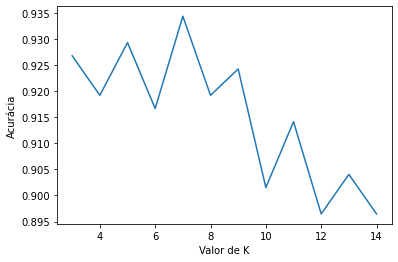

In [60]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(K_neighbors, scores_list)
plt.xlabel("Valor de K")
plt.ylabel("Acurácia")

In [61]:
# Melhores valores:
# K=5 e 7
# Accuracy=0.92

# Classificador Regressão logística

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


clf = LogisticRegression()
clf.fit(X_train,y_train)


LogisticRegression()

In [65]:
y_pred = clf.predict(X_test)
print(f"Acurácia: {accuracy_score(y_test, y_pred)*100}%")

Acurácia: 91.91919191919192%
